## Data Processing

In this notebook we will load and process all of the taxi data from 2011 to 2025.

The data is stored in data/raw as parquets.

It will be saved to data/processed as both parquets and csvs. 

We will save both the full dataset for each year, as well as the data for JFK and two time series for each year. One for a daily pickup taxi count at JFK and one for an hourly pickup taxi count at JFK (by day by hour).

We use our own process_taxi_data function that can be found in src/ This function will also perform some basic data cleaning as well.


In [2]:
from jfk_taxis import process_taxi_data, taxi_data_visuals, ts_plots, combine_ts, plot_full_ts
import pandas as pd

In [3]:
# We do some inital data exploration on each year just to get a feel for the data, we only select columns "tpep_pickup_datetime" and "PULocationID" as otherwise we are trying to load approx 1.2GB of data for earlier years like 2011. 
# One of the interesting things in the plot is that for 2021 say we clearly have data that is not just from 2021, this will be cleaned up in process_taxi_data 
# which you can see inside src/jfk_taxis/data_processing.py

# Select the years to perfrom some basic EDA on, this can take a long time. Particularly with earlier years like 2011 as they have approx 170M rows which is a fair amount for pandas to handle
# so its recommend exploring only a few years. The reason for there being a lot more taxi trips in earlier years is likely due to things like Uber and the introduction of green taxis in NYC.

# The other interesting thing is 2009 and 2011 are both using lat long data so have been excluded for now. 

# Years to perfrom some basic EDA on, the daily trip count is for the whole of NYC not just JFK airport
years = [2011, 2015, 2020, 2025]

taxi_data_visuals(years)

In [3]:
# We provide a list of years of data to process
years = list(range(2011, 2026))

# We provide a list of features we want time series for
features = ["daily", "hour"]

# Process the data
process_taxi_data(years, features)

Processing years:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Download files: : 0it [00:00, ?it/s]

In [5]:
# We combine the years into two single csvs:
combine_ts(years)

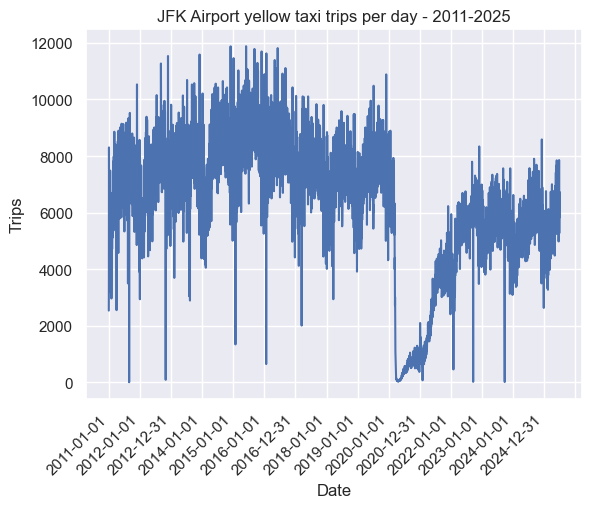

In [6]:
# Plot the full daily time series
dir_path = "../data/processed/"
years = list(range(2011, 2026))

df_daily = pd.read_csv(f"{dir_path}ts_daily{years[0]}-{years[-1]}.csv")

plot_full_ts(df_daily, years)

Interestingly in the above you can seee the sharp dip and slow rise due to COVID. You can also see that yellow taxi numbers haven't yet recovered to their pre COVID numbers.

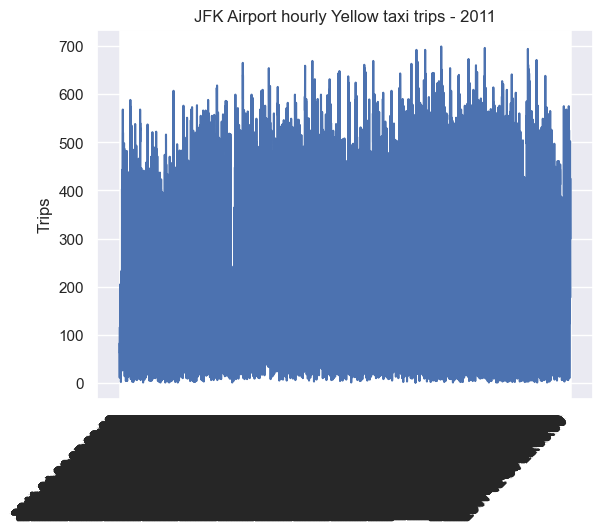

AttributeError: Can only use .dt accessor with datetimelike values

In [7]:
# Plot the collected time series, we do an hourly plot for the whole year, hourly plot just for Janurary (the [x,y] determines which months to plot between in ts_plots) and a daily plot for the whole year

# You can see the effect of the COVID 2020 lockdowns in the data as well

years = [2011, 2016, 2020, 2025]

for year in years:
    file_hour = "ts_hour" + str(year) + ".csv"
    file_daily = "ts_daily" + str(year) + ".csv"
    
    df_hour = pd.read_csv(dir_path + file_hour)
    df_daily = pd.read_csv(dir_path + file_daily)

    ts_plots(df_hour, "hour", year, [])
    ts_plots(df_hour, "hour", year, [1, 1])
    ts_plots(df_daily, "daily", year, [])


In [4]:
df = pd.read_csv(dir_path + "ts_hour2024.csv")


In [5]:
df.head()

,pickup_date,pickup_hour,trips,dt
0,2024-01-01,0,150,2024-01-01 00:00:00
1,2024-01-01,1,68,2024-01-01 01:00:00
2,2024-01-01,2,21,2024-01-01 02:00:00
3,2024-01-01,3,18,2024-01-01 03:00:00
4,2024-01-01,4,26,2024-01-01 04:00:00


In [6]:
df.dtypes

pickup_date    object
pickup_hour     int64
trips           int64
dt             object
dtype: object